In [ ]:
# Import necessary libraries
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file into a Pandas DataFrame
df = pd.read_csv('../data/songs_data.csv')

# Cleaning, Exploring and Processing Data


In [ ]:
# Display the first five rows of the dataset
df.head()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# Get the number of rows and columns in the DataFrame
df.shape

(32833, 19)

In [ ]:
# Get the number of duplicates in the DataFrame
df.duplicated().sum()

323

In [ ]:
# Remove any duplicate rows from the DataFrame
df = df.drop_duplicates()
# Get the new number of rows and columns after duplicates are removed
df.shape

(32510, 19)

In [ ]:
# Identify non-numerical columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numeric_columns)

Non-numerical columns: Index(['track_id', 'track_name', 'track_artist', 'playlist_name',
       'playlist_id', 'genre'],
      dtype='object')


In [ ]:
# Check for possible missing values

missing_values = df.isnull().sum()
missing_values

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
playlist_name,0
playlist_id,0
genre,0
danceability,0
energy,0
key,0


In [ ]:
# Drop rows with any missing values
df = df.dropna()

df.shape

(32505, 19)

In [ ]:
# Check the summary statistics
df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000,32505.000000
mean,42.473004,0.654989,0.698198,5.375788,-6.728720,0.565451,0.107328,0.175974,0.084103,0.190204,0.511471,120.887826,225800.996462
std,24.887421,0.145236,0.180808,3.612655,2.990893,0.495705,0.101535,0.219770,0.223553,0.154447,0.233108,26.954692,59856.532173
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.184000,0.000000,0.041100,0.015300,0.000000,0.092700,0.331000,99.955000,187858.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.173000,1.000000,0.062700,0.081200,0.000016,0.127000,0.513000,121.972000,216084.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.654000,1.000000,0.132000,0.256000,0.004640,0.248000,0.694000,133.970000,253547.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
# Check the distribution of genres
df['genre'].value_counts()

,count
genre,
edm,5899
rap,5743
pop,5507
r&b,5431
latin,5059
rock,4866


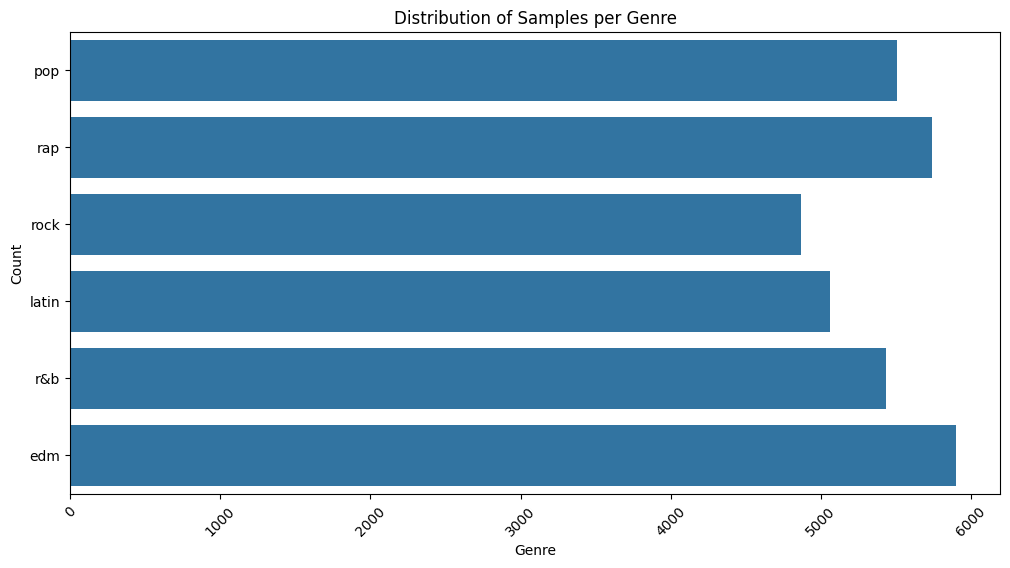

In [ ]:
# Create a Plot for  the distribution of genres
plt.figure(figsize=(12, 6))
sns.countplot(df['genre'])
plt.title('Distribution of Samples per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

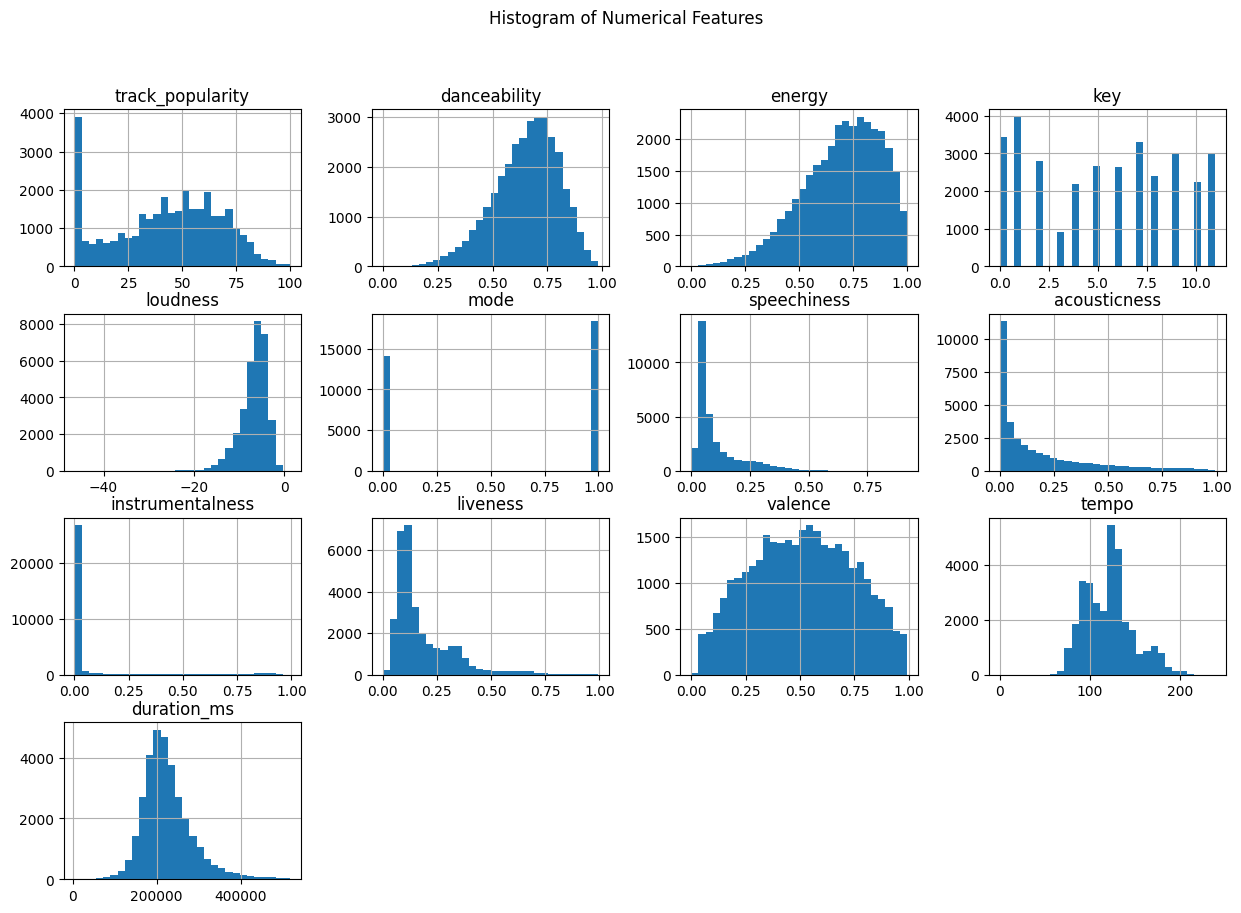

In [ ]:
# Plot histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

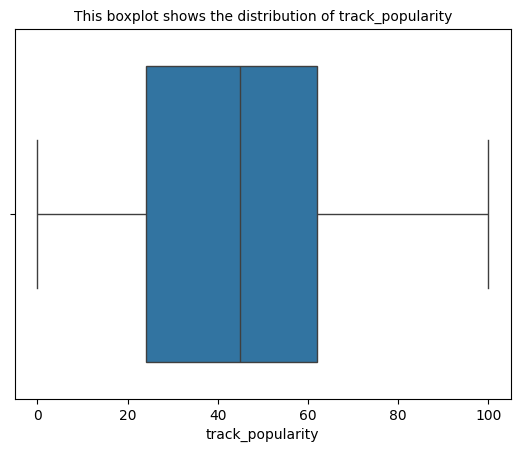

In [ ]:
# Create a boxplot showing the distribution of the feature 'track_popularity'
sns.boxplot(x=df.track_popularity)
plt.title("This boxplot shows the distribution of track_popularity", size=10);

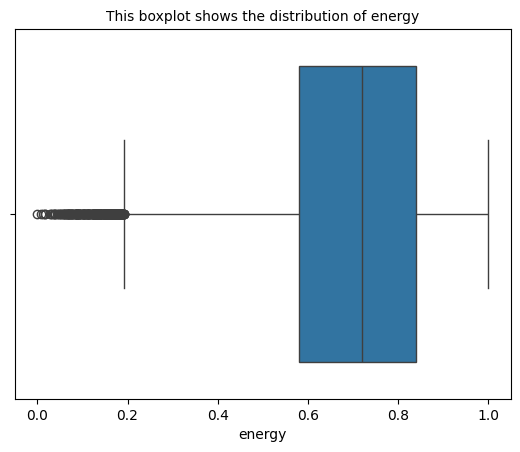

In [ ]:
# Create a boxplot showing the distribution of the feature 'energy'
sns.boxplot(x=df.energy)
plt.title("This boxplot shows the distribution of energy", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with energy below 0.2
df = df[df.energy > 0.2]

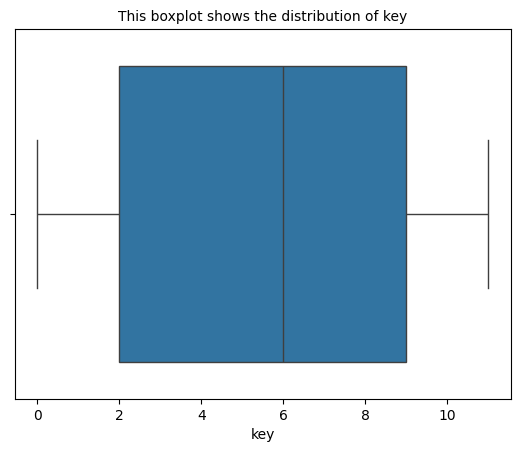

In [ ]:
# Create a boxplot showing the distribution of the feature 'key'
sns.boxplot(x=df.key)
plt.title("This boxplot shows the distribution of key", size=10);

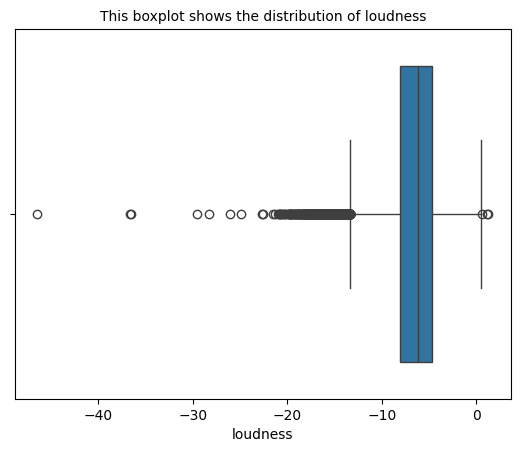

In [ ]:
# Create a boxplot showing the distribution of the feature 'loudness'
sns.boxplot(x=df.loudness)
plt.title("This boxplot shows the distribution of loudness", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with loudness below -14
df = df[df.energy > -14]

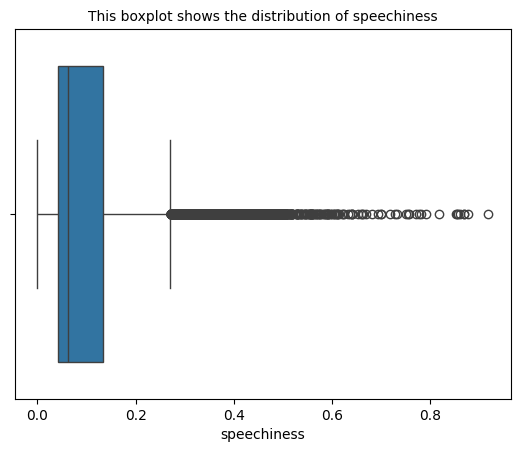

In [ ]:
# Create a boxplot showing the distribution of the feature 'speechiness'
sns.boxplot(x=df.speechiness)
plt.title("This boxplot shows the distribution of speechiness", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with speechiness above 0.26
df = df[df.speechiness < 0.26]

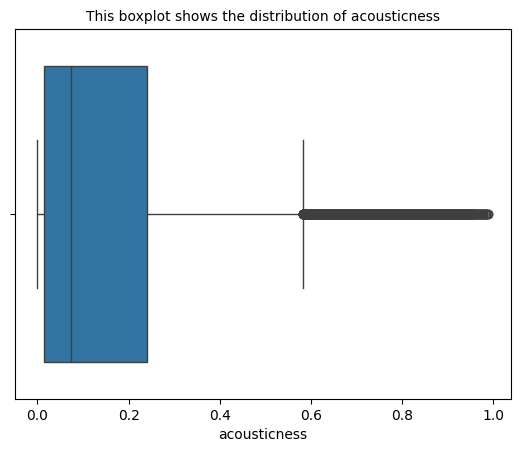

In [ ]:
# Create a boxplot showing the distribution of the feature 'acousticness'
sns.boxplot(x=df.acousticness)
plt.title("This boxplot shows the distribution of acousticness", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with acousticness above 0.61
df = df[df.acousticness < 0.61]

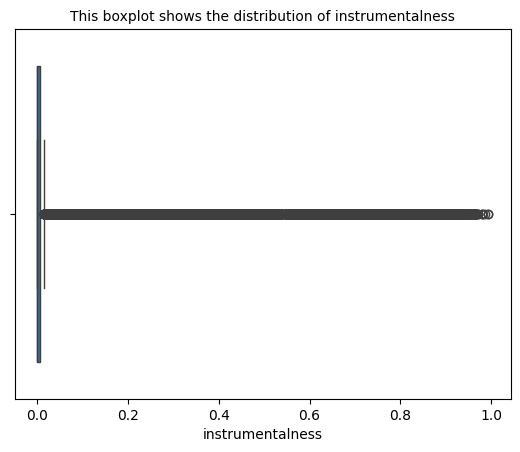

In [ ]:
# Create a boxplot showing the distribution of the feature 'instrumentalness'
sns.boxplot(x=df.instrumentalness)
plt.title("This boxplot shows the distribution of instrumentalness", size=10);

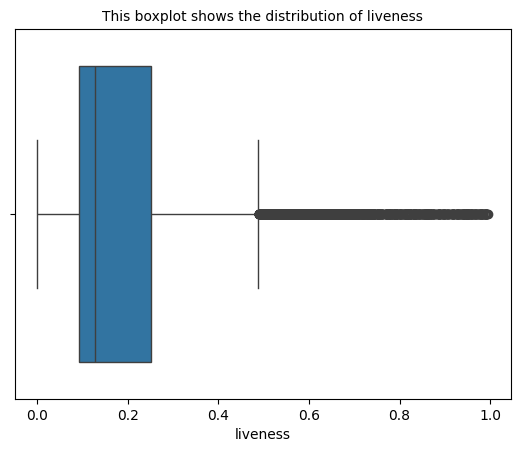

In [ ]:
# Create a boxplot showing the distribution of the feature 'liveness'
sns.boxplot(x=df.liveness)
plt.title("This boxplot shows the distribution of liveness", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with liveness above 0.48
df = df[df.liveness < 0.48]

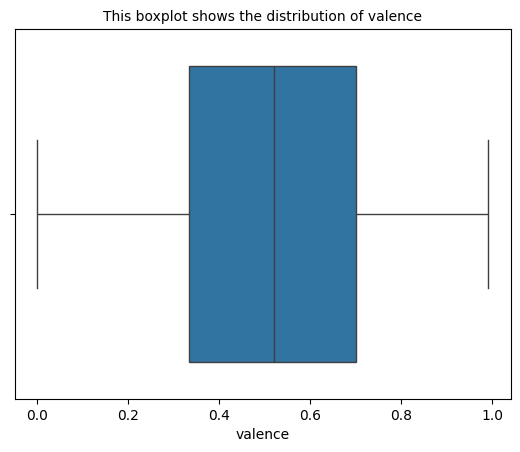

In [ ]:
# Create a boxplot showing the distribution of the feature 'valence'
sns.boxplot(x=df.valence)
plt.title("This boxplot shows the distribution of valence", size=10);

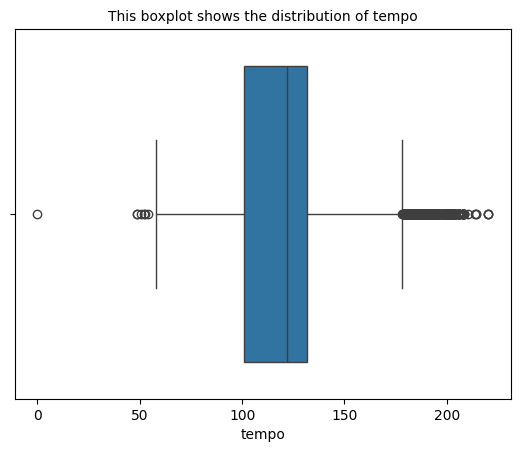

In [ ]:
# Create a boxplot showing the distribution of the feature 'tempo'
sns.boxplot(x=df.tempo)
plt.title("This boxplot shows the distribution of tempo", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with tempo below 50 and above 185
df = df[df.tempo > 50]
df = df[df.tempo < 185]

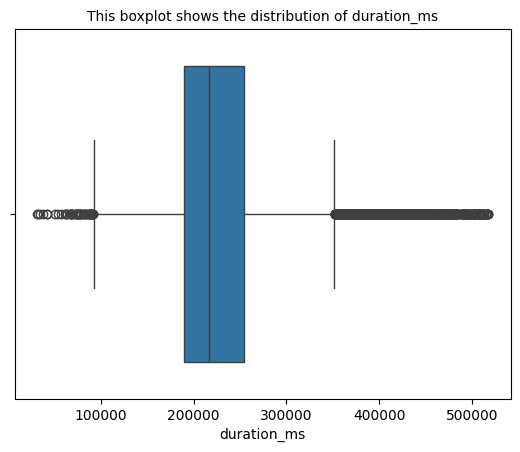

In [ ]:
# Create a boxplot showing the distribution of the feature 'duration_ms'
sns.boxplot(x=df.duration_ms)
plt.title("This boxplot shows the distribution of duration_ms", size=10);

In [ ]:
# based on this output, will remove the outliers i.e. all songs with tempo below 90000 and above 350000
df = df[df.duration_ms > 90000]
df = df[df.duration_ms < 350000]

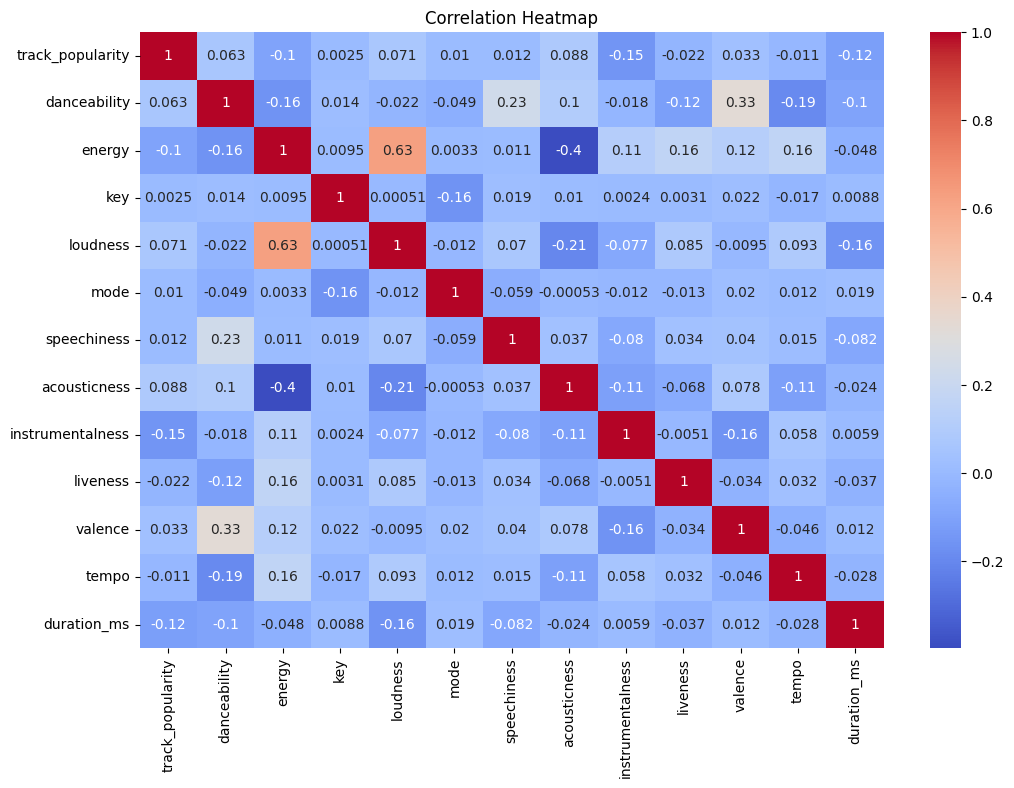

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# From our conclusions of exploring the Data, we decided to drop the following columns

# Drop the 'track_name' column from the DataFrame
df.drop(['track_name'], axis=1, inplace=True)

# Drop the 'track_artist' column from the DataFrame
df.drop(['track_artist'], axis=1, inplace=True)


# Drop the 'playlist_id' column from the DataFrame
df.drop(['playlist_id'], axis=1, inplace=True)

# Drop the 'key' column from the DataFrame
df.drop(['key'], axis=1, inplace=True)

# Drop the 'liveness' column from the DataFrame
df.drop(['liveness'], axis=1, inplace=True)

# Drop the 'mode' column from the DataFrame
df.drop(['mode'], axis=1, inplace=True)



# Display the first five rows of the updated DataFrame
df.head()

,track_id,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,66,Pop Remix,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,67,Pop Remix,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,70,Pop Remix,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,60,Pop Remix,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,69,Pop Remix,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052


# Feature Engineering

In [ ]:
# Set 'track_id' as the index for the DataFrame
df = df.set_index('track_id')
# Display the first five rows of the updated DataFrame
df.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,66,Pop Remix,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,67,Pop Remix,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,70,Pop Remix,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,60,Pop Remix,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,69,Pop Remix,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052


In [ ]:
# Label encoding the 'genre' column
df['genre'].unique()

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode the 'genre' column using the label encoder
df['genre']= label_encoder.fit_transform(df['genre'])
df['genre'].unique()

# Display the newly assigned labels for each genre
genre_label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label-Encoding Assignment (Genre -> Label):")
for genre, label in genre_label_mapping.items():
    print(f"{genre}: {label}")

Label-Encoding Zuordnung (Genre -> Label):
edm: 0
latin: 1
pop: 2
r&b: 3
rap: 4
rock: 5


In [ ]:
# Display the first five rows of the updated DataFrame
df.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,66,Pop Remix,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,67,Pop Remix,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,70,Pop Remix,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,60,Pop Remix,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,69,Pop Remix,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052


In [ ]:
# Label encoding the 'playlist_name' column
df['playlist_name'].unique()

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode the 'playlist_name' column using the label encoder
df['playlist_name']= label_encoder.fit_transform(df['playlist_name'])

df['playlist_name'].unique()

# Display the first five rows of the updated DataFrame
df.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052


In [ ]:
# Create new features by combining two separate features

# Danceability-Valence Interaction: combination of Danceability and Valence
df['danceability_valence_interaction'] = df['danceability'] * df['valence']

# Instrumentalness-Acousticness Interaction: combination of Instrumentalness and Acousticness
df['instrumentalness_acousticness_interaction'] = df['instrumentalness'] * df['acousticness']

df.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,danceability_valence_interaction,instrumentalness_acousticness_interaction
track_id,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.518,122.036,194754,0.387464,0.000000e+00
0r7CVbZTWZgbTCYdfa2P31,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.693,99.972,162600,0.503118,3.048040e-04
1z1Hg7Vb0AhHDiEmnDE79l,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.613,124.008,176616,0.413775,1.850020e-06
75FpbthrwQmzHlBJLuGdC7,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.277,121.956,169093,0.198886,2.706410e-07
1e8PAfcKUYoKkxPhrHqw4x,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.725,123.976,189052,0.471250,0.000000e+00


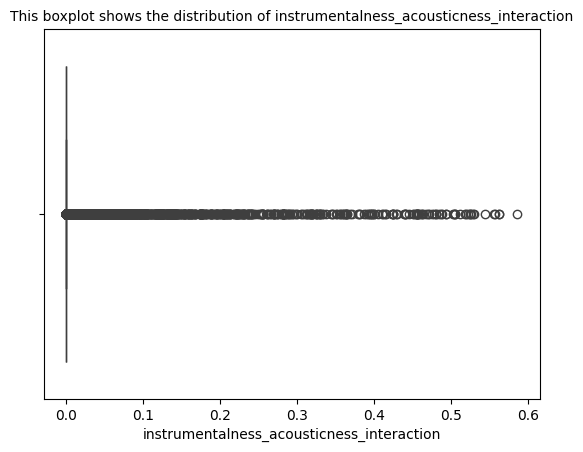

In [ ]:
# Create a boxplot showing the distribution of the feature 'instrumentalness_acousticness_interaction'
sns.boxplot(x=df.instrumentalness_acousticness_interaction)
plt.title("This boxplot shows the distribution of instrumentalness_acousticness_interaction", size=10);

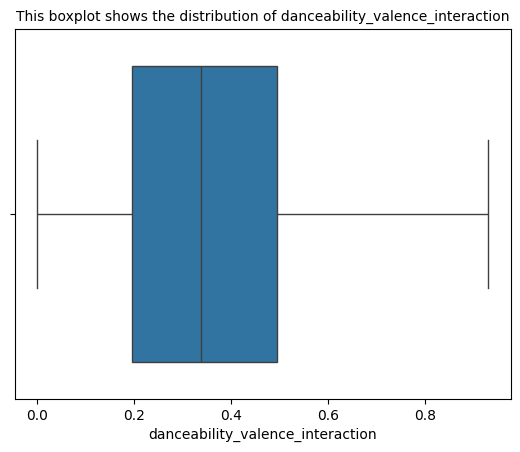

In [ ]:
# Create a boxplot showing the distribution of the feature 'danceability_valence_interaction'
sns.boxplot(x=df.danceability_valence_interaction)
plt.title("This boxplot shows the distribution of danceability_valence_interaction", size=10);

In [ ]:
# Separate the features from the target variable
features = df.drop(['genre'], axis=1)

# Define the target variable
target = df['genre']

# Analyzing and Predicting - XGB Classifier

In [ ]:
# Import train_test_split function from sklearn for splitting the dataset
from sklearn.model_selection import train_test_split

# Split the features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)

In [ ]:
# Import the xgBoost classifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
clf_xgb = XGBClassifier()

In [ ]:
# Train the XGBoost classifier on the training data
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the test data using the trained XGBoost model
y_pred_xgb = clf_xgb.predict(X_test)

In [ ]:
# Import confusion matrix and confusion matrix display utilities from sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

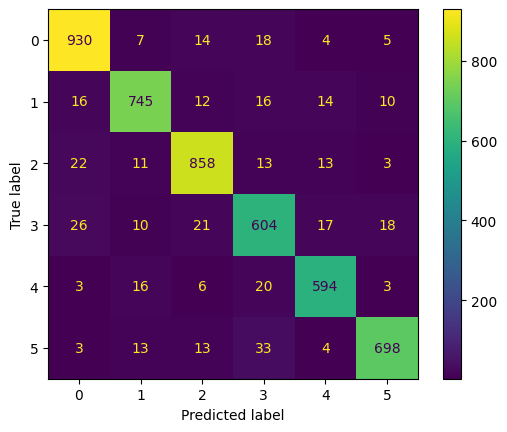

In [ ]:
# Plot a confusion matrix to analyze results
cm= confusion_matrix(y_test, y_pred_xgb)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,

                            display_labels = clf_xgb.classes_)

disp.plot();

From this matrix, we can tell, that this model overall is best at recognizing the genre 'edm'(number 0), and struggles the most with the genre 'rap' (number 4), which it mostly confuses with the genre 'r&b' (number 3). Some other predictions, that have high confusion rates are the genres 'rock' (number 5), which often was confused as 'r&b', and 'edm', which often was confused as the genre 'r&b'.

In [ ]:
# Import the accuracy score function from sklearn
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred_xgb)

# Display the accuracy
accuracy

0.9202160814460836

In [ ]:
# Import the precision score function from sklearn
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, y_pred_xgb, average='macro')

0.9186735111275196

In [ ]:
# Import the recall score function from sklearn
from sklearn.metrics import recall_score

# Display the recall score
recall_score(y_test, y_pred_xgb, average='macro')

0.9177584011502408

In [ ]:
# Import the f1 score function from sklearn
from sklearn.metrics import f1_score

# Display the f1 score
f1_score(y_test, y_pred_xgb, average='macro')

0.918132351828405

In [ ]:
# Create a function, that visualizes the ten most important features used by the algorithm

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting

    @return a plot with the Top n features
    """

    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

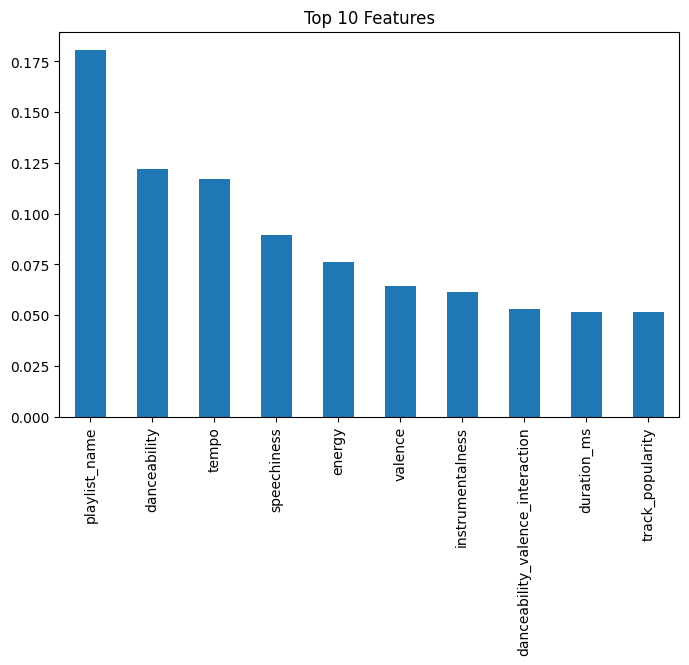

In [ ]:
# Creating a plot, that shows the ten most important features used by the algorithm
feature_importance_plot(clf_xgb, X_train, n = 10)

In [ ]:
# Create a function that creates and visualizes a learning curve

def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation

    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target

    @returns a plot of the learning curve
    """

    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()


    plt.show()

In [ ]:
# Import necessary functions
from sklearn.model_selection import learning_curve, cross_val_score

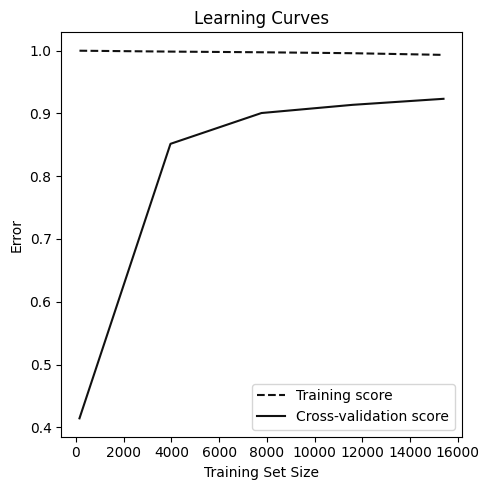

In [ ]:
# Create the plot that shows the learning curve of the algorithm
learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

# Conclusion

From experimenting with the engineering of features and evaluating the final scores, learning curve and distribution of feature importance, we have come to the conclusion that by using this combination we can get the most reliable and accurate results.
While we are aware that our model is not perfect, since the learning curve shows a certain unreliability and the model heavily uses the encoded feature "playlist_name", we have decided to prioritize the number of good scores over this small flaw.
The alternative solution of using the Random forest machine learning model, relied on the feature 'playlist_name' even stronger and therefore gave less reliable results.

Considering these results, we decided to use the XCBoost algorithm as our final solution, since it showed the most accurate